<a href="https://colab.research.google.com/github/bekka9/search-program-control/blob/main/TU1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

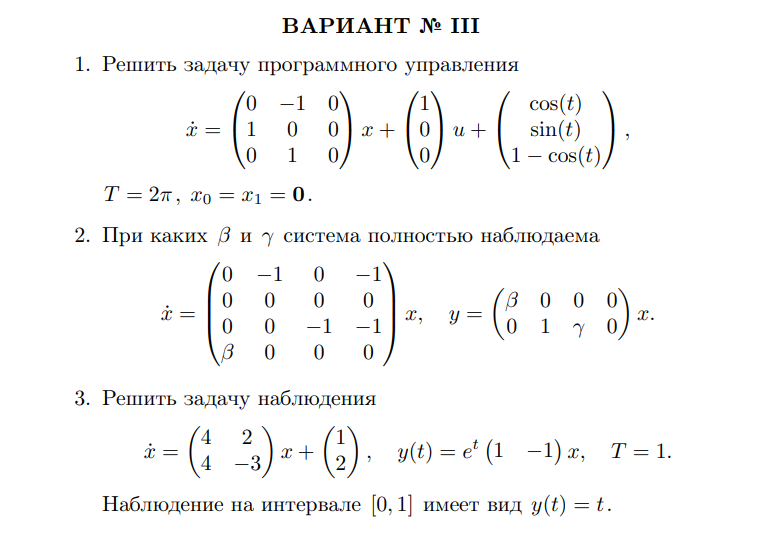

№1 найти программное управление


In [ ]:
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
import scipy as sp
import sympy as sym

t = sym.Symbol('t')

n = 2
m = 1
def fully_controllable(P, Q, n):
  Q_ = Q
  S = Q_
  Pk = P
  P_ = Pk
  for i in range (1, n, 1):
    S  = sym.Matrix.hstack(S,(-1)**i * (Pk*Q_))
    Pk = Pk*P_
  print(S)
  if (S.rank() == n):
    return "fully_controllable"
  else:
    return "not fully_controllable"

def controllable(n, m, P, Q, f, T, x0, x1, t):
  obs = fully_controllable(P, Q, n)
  if (obs == "not fully_controllable"):
    print("not fully_controllable")
    return 0

  #e, v = np.linalg.eig(P)
  #np.sort(e)
  Y = sym.simplify(sym.exp(P*t))
  print("Y = ", Y)
  B = sym.simplify((sym.simplify(Y**(-1)))*Q)
  V = sym.Symbol('V')
  V = sym.solve(sym.integrate(B*V,(t, 0, T)),V)
  #sym.nonlinsolve(sym.integrate(B*V,(t, 0, T)), [V, x])
  print("V = ", V)
  A = sym.integrate(B*(B.T),(t, 0, T))
  it = sym.integrate(sym.simplify(Y**(-1))*f,(t, 0, T))
  tn = sym.simplify(Y**(-1))*x1-x0 - it
  print("eta = ",  tn)
  C = sym.simplify(A**(-1))*tn
  print("C = ", C)
  v1 = sym.sympify("V")
  V = v1.subs(V, V)
  U = sym.simplify((B.T)*C )
  print("A = ",  A)
  print("B = ",  B)
  return( U)

P = sym.Matrix([[2, 1], [-1, 2]])

x0 = sym.Matrix([1, 1])
x1 = sym.Matrix([0, 0])
T = 2* np.pi

Q = sym.Matrix([sym.exp(2*t),0])
f = sym.Matrix([0, sym.exp(2*t)*sym.sin(t)])


controllable(2, 1, P, Q, f, 2* np.pi, x0, x1, t)


Matrix([[exp(2*t), -2*exp(2*t)], [0, exp(2*t)]])
Y =  Matrix([[exp(t*(2 - I))/2 + exp(t*(2 + I))/2, I*(exp(t*(2 - I)) - exp(t*(2 + I)))/2], [I*(-exp(t*(2 - I)) + exp(t*(2 + I)))/2, exp(t*(2 - I))/2 + exp(t*(2 + I))/2]])
V =  {V: 0.0}
eta =  Matrix([[2.14159265358979], [-1.00000000000000]])
C =  Matrix([[0.681690113816209], [-0.318309886183791]])
A =  Matrix([[3.14159265358979, 2.99951956532372e-32], [2.99951956532372e-32, 3.14159265358979]])
B =  Matrix([[cos(t)], [sin(t)]])


Matrix([[-0.318309886183791*sin(t) + 0.681690113816209*cos(t)]])

In [ ]:
fully_controllable(P, Q, n)


Matrix([[exp(2*t), -2*exp(2*t)], [0, exp(2*t)]])


'fully_controllable'

In [ ]:
P = sym.Matrix([[0, -1, 0], [1, 0, 0], [0, 1, 0]])

x0 = sym.Matrix([0, 0, 0])
x1 = sym.Matrix([0, 0, 0])
T = 1* np.pi

Q = sym.Matrix([1, 0, 0])
f = sym.Matrix([ sym.cos(t), sym.sin(t), 1 - sym.cos(t)])


controllable(2, 1, P, Q, f, 1* np.pi, x0, x1, t)

n = 3
m = 1
fully_controllable(P, Q, n)


Matrix([[1, 0], [0, -1], [0, 0]])
Y =  Matrix([[cos(t), -sin(t), 0], [sin(t), cos(t), 0], [1 - cos(t), sin(t), 1]])
V =  {V: 0.0}
eta =  Matrix([[-3.14159265358979], [0], [2.35581715767996e-32]])
C =  Matrix([[-7.27898008548688], [-6.72140620071131], [-5.27898008548688]])
A =  Matrix([[1.57079632679490, -7.49879891330929e-33, -1.57079632679490], [-7.49879891330929e-33, 1.57079632679490, -2.00000000000000], [-1.57079632679490, -2.00000000000000, 4.71238898038469]])
B =  Matrix([[cos(t)], [-sin(t)], [1 - cos(t)]])
Matrix([[1, 0, -1], [0, -1, 0], [0, 0, 1]])


'fully_controllable'

№2 - полная  наблюдаемость

In [ ]:
betha = sym.Symbol("betha")
gamma = sym.Symbol("gamma")
P = sym.Matrix([[0, -1, 0, -1], [0, 0, 0, 0], [0, 0, -1, -1], [betha, 0, 0, 0]])
R = sym.Matrix([[betha, 0, 0, 0], [0, 1, gamma, 0]])

#x0 = sym.Symbol("x0")
phi = 0
f = 0
T = 2* np.pi
Y = sym.simplify(sym.exp(P*t))
#x = Y*x0
#H = sym.simplify(R*Y)
#g = H*x0
#D = sym.integrate((H.T)*H),(t, 0, T))
#eta = sym.integrate((H.T)*g,(t, 0, T))
#-------------------------------
n = 4
def fully_observable(P, R, n ):
  R_ = R.T
  S = R.T
  Pk = P.T
  P_ = P.T
  for i in range (1, n-2, 1):
    S  = sym.Matrix.hstack(S, Pk*R_)
    Pk = Pk*P_
  #print(S.rank())
  #print(np.linalg.matrix_rank(S))
#  if (S.rank() == n):
#    return "fully_observable"
#  else:
#    return "not fully_observable"
  print(S)
  return sym.simplify(S.det())

fully_observable(P, R, n)

Matrix([[betha, 0, 0, 0], [0, 1, -betha, 0], [0, gamma, 0, -gamma], [0, 0, -betha, -gamma]])


-betha**2*gamma*(gamma + 1)

In [ ]:
H

Matrix([
[                                                                                                                                                                                             betha*cosh(t*sqrt(-betha)),                                                                                                  -betha*sinh(t*sqrt(-betha))/sqrt(-betha),             0,                                                                                                                                          -betha*sinh(t*sqrt(-betha))/sqrt(-betha)],
[gamma*(betha**2*exp(t) - 2*betha**2*exp(t*sqrt(-betha)) + betha**2*exp(t*(2*sqrt(-betha) + 1)) + (-betha)**(3/2)*exp(t) - (-betha)**(3/2)*exp(t*(2*sqrt(-betha) + 1)))*exp(-t*(sqrt(-betha) + 1))/(2*betha*(betha + 1)), gamma*(-betha*exp(-t)/(betha + 1) + t*exp(-t*sqrt(-betha))/(2*(t*sqrt(-betha) - t)) + 1 - exp(t*sqrt(-betha))/(2*(sqrt(-betha) + 1))) + 1, gamma*exp(-t), gamma*(-sqrt(-betha)*exp(t) + sqrt(-betha)*exp(t*(2*sqrt(-betha) + 

№3 восстановление начальных данных по наблюдениям

In [ ]:
t = sym.Symbol("t")
tau = sym.Symbol("tau")
P = sym.Matrix([[4, 2], [4, -3]])

T = 1
n = 2
m = 1
def R_(t):
  return sym.Matrix([[sym.exp(t), -sym.exp(t)]])
R = sym.Matrix([[sym.exp(t), -sym.exp(t)]])
f = sym.Matrix([1, 2])
phi = sym.Matrix([0])
y = sym.Matrix([t])


def observable(P, R, T, y, n):
  #obs = fully_observable(P, R, n)
  #if (obs == "not fully_observable"):
  #  print("not fully_observable")
  #  return 0
  ##x0 = sym.Symbol("x0")
  Y = sym.simplify(sym.exp(P*t))
  Yt = sym.simplify(sym.exp(P*tau))
  print("Y = ", Y)
  H = sym.simplify(R*Y)
  print("H = ", H)
  gg = sym.integrate((sym.simplify(Y.inv(method="LU"))*f),(t, 0, t))
  Hg = H * gg
  g = y - phi - Hg
  print("g = ", g)
  D = sym.integrate((H.T)*H,(t, 0, T))
  print("D = ", D)
  eta = sym.integrate((H.T)*g,(t, 0, T))
  print("eta = ", eta)
  #d_ = sym.simplify(D**(-1))
  ##eq = sym.Eq(D*x0, eta)
  if D.det() == 0:
      return('not fully_observable')
  else:
      x0 = D.inv(method="LU") * eta
      print("x0 = ", x0.evalf())
      return sym.simplify(Y * (x0 + gg))
  #x0 = sym.simplify(D**(-1))*eta
  ##x0 = sym.solveset(eq, x0)
  #print("x0 = ", x0)
  #x = Y*x0


observable(P, R, T, y, n)


Y =  Matrix([[(8*exp(9*t) + 1)*exp(-4*t)/9, (2*exp(9*t) - 2)*exp(-4*t)/9], [(4*exp(9*t) - 4)*exp(-4*t)/9, (exp(9*t) + 8)*exp(-4*t)/9]])
H =  Matrix([[(4*exp(9*t) + 5)*exp(-3*t)/9, (exp(9*t) - 10)*exp(-3*t)/9]])
g =  Matrix([[t - (exp(9*t) - 10)*(exp(4*t)/3 - 1/5 - 2*exp(-5*t)/15)*exp(-3*t)/9 - (4*exp(9*t) + 5)*(-exp(4*t)/12 + 7/20 - 4*exp(-5*t)/15)*exp(-3*t)/9]])
D =  Matrix([[-7/54 - 25*exp(-6)/486 + 40*exp(3)/243 + 4*exp(12)/243, -35*exp(3)/243 + 25*exp(-6)/243 + 1/27 + exp(12)/243], [-35*exp(3)/243 + 25*exp(-6)/243 + 1/27 + exp(12)/243, -20*exp(3)/243 - 50*exp(-6)/243 + 31/108 + exp(12)/972]])
eta =  Matrix([[-2*exp(12)/405 - 7*exp(3)/81 - 11*exp(-2)/72 - 20*exp(-3)/81 + 25*exp(-6)/648 + 185/756 + 5*exp(6)/81 + 11*exp(7)/315], [-exp(12)/810 - 295/756 - 25*exp(-6)/324 + 40*exp(-3)/81 + 11*exp(-2)/36 + 11*exp(3)/324 + 5*exp(6)/324 + 11*exp(7)/1260]])
x0 =  Matrix([[-0.0119299813521492], [-1.06468068677836]])


Matrix([
[(-2560*exp(9*t) + 735*exp(4*t) + 735*exp(4*t + 3) - 5880*exp(4*t + 6) + 5880*exp(4*t + 9) - 735*exp(4*t + 12) - 735*exp(4*t + 15) + 42240*exp(9*t + 3) + 27720*exp(9*t + 4) - 31920*exp(9*t + 6) + 3960*exp(9*t + 7) + 7000*exp(9*t + 9) + 3960*exp(9*t + 10) - 1485*exp(13) - 1547*exp(12) - 693*exp(10) - 147*exp(9) - 693*exp(7) - 693*exp(4) - 1120*exp(3) + 365*exp(6) + 973*exp(15))*exp(-4*t)/(2100*(-8*exp(9) - exp(3) - 1 + 8*exp(6) + exp(12) + exp(15)))],
[          (-320*exp(9*t) - 105*exp(4*t) - 105*exp(4*t + 3) + 840*exp(4*t + 6) - 840*exp(4*t + 9) + 105*exp(4*t + 12) + 105*exp(4*t + 15) + 5280*exp(9*t + 3) + 3465*exp(9*t + 4) - 3990*exp(9*t + 6) + 495*exp(9*t + 7) + 875*exp(9*t + 9) + 495*exp(9*t + 10) - 973*exp(15) - 365*exp(6) + 1120*exp(3) + 693*exp(4) + 693*exp(7) + 147*exp(9) + 693*exp(10) + 1547*exp(12) + 1485*exp(13))*exp(-4*t)/(525*(-8*exp(9) - exp(3) - 1 + 8*exp(6) + exp(12) + exp(15)))]])

In [ ]:

P = sym.Matrix([[0, 1], [-1, 0]])
T = 2*np.pi
R = sym.Matrix([[1, 0]])
f = sym.Matrix([1, 0])
phi = sym.Matrix([0])
y = sym.Matrix([2*sym.cos(t)])

стабилизация полностью управляемой системы со скалярным входом

In [ ]:
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
import scipy as sp
import sympy as sym

t = sym.Symbol('t')
r = 1
n = 4
m = 1
def fully_controllable(P, Q, n):
  Q_ = Q
  S = Q_
  Pk = P
  P_ = Pk
  for i in range (1, n, 1):
    S  = sym.Matrix.hstack(S, (Pk*Q_))
    Pk = Pk*P_
  print(S)
  if (S.rank() == n):
    return S
  else:
    return "not fully_controllable"

#n = 3
#P = sym.Matrix([[1, -2, 2], [-1, 2, -1], [1, 1, 0]])
#Q = sym.Matrix([0, 0, 1])
#mu = sym.Matrix([-2, -1, -3])


def stabilization_skalar(P, Q, mu):
  obs = fully_controllable(P, Q, n)
  if (obs == "not fully_controllable"):
    print("not fully_controllable")
    return 0
  else: S = obs

  P_f = (S.inv() * P) * S
  #print(P_f)
  #P_ = P_f[:, n-1]
  p = (P.charpoly()).all_coeffs()[1:]
  print("p = ", p)
  K = (np.eye(n, n))
  for i in range(n):
    for j in range (i + 1, n):
      #K[i][j] = P_[n - (j - i)]
      K[i][j] = p[j - i - 1]

  print("K = ", K)
  K = sym.Matrix(K)
  M = (np.eye(n, n))
  for i in range(n):
    M[i][i] = mu[i]
  M = sym.Matrix(M)
  print(M.charpoly())
  cf = (M.charpoly()).all_coeffs()
  d = cf[1:]
  print ("d = ", d)
  gamma = np.zeros(n)
  for i in range(n):
    #gamma[i] = P_[n - i - 1] - d[i]
    gamma[i] = p[i] - d[i]

  gamma = sym.Matrix(gamma)
  print ("gamma = ", gamma)
  sk = ((S*K).inv())
  C = gamma.T * sk
  return (C)



№1

In [ ]:
#---------#1-----------
P = sym.Matrix([[0, 0, 1, 0], [1, 0, 2, 2], [1, 0, 0, 0], [1, -1, 0, 0]])
Q = sym.Matrix([0, 0, 1, 0])
mu = sym.Matrix([-1, -2, -3, -4])
stabilization_skalar(P, Q, mu)
#-------------------------

Matrix([[0, 1, 0, 1], [0, 2, 1, 0], [1, 0, 1, 0], [0, 0, -1, -1]])
p =  [0, 1, 0, -2]
K =  [[1. 0. 1. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
PurePoly(1.0*lambda**4 + 10.0*lambda**3 + 35.0*lambda**2 + 50.0*lambda + 24.0, lambda, domain='RR')
d =  [10.0000000000000, 35.0000000000000, 50.0000000000000, 24.0000000000000]
gamma =  Matrix([[-10.0000000000000], [-34.0000000000000], [-50.0000000000000], [-26.0000000000000]])


Matrix([[14.0, -24.0, -10.0, 5.99999999999999]])

№2

In [ ]:
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
import scipy as sp
import sympy as sym

t = sym.Symbol('t')
r = 2
n = 3
m = 1
def fully_controllable(P, Q, n):
  Q_ = Q
  S = Q_
  Pk = P
  P_ = Pk
  for i in range (1, n, 1):
    S  = sym.Matrix.hstack(S, (Pk*Q_))
    Pk = Pk*P_
  print(S)
  if (S.rank() == n):
    return S
  else:
    return "not fully_controllable"

#n = 3
#P = sym.Matrix([[1, -2, 2], [-1, 2, -1], [1, 1, 0]])
#Q = sym.Matrix([0, 0, 1])
#mu = sym.Matrix([-2, -1, -3])


def stabilization_skalar(P, Q, mu):
  obs = fully_controllable(P, Q, n)
  if (obs == "not fully_controllable"):
    print("not fully_controllable")
    return 0
  else: S = obs
#----------T----------
  e_n = 1
  q1 = Q[:,0]
  T = q1
  P_k = P
  for j in range (1, n):
      if (e_n == n):
        break
      ve = sym.Matrix.hstack(T, P_k*q1)
      print("ve", ve)
      if (ve.rank() == e_n + 1):
        T = ve
        e_n += 1
      P_k = P_k*P
  print("T = ", T)
  n11 = e_n
  for i in range (r):
    q1 = Q[:,i]
    P_k = sym.eye(n)

    for j in range (1, n):
      if (e_n == n):
        break
      ve = sym.Matrix.hstack(T, P_k*q1)
      if (ve.rank() == e_n + 1):
        T = ve
        e_n += 1
      P_k = P_k*P
    if (e_n == n):
      break
  print("T = ", T)
  print("T^-1 = ", T.inv())
  n22 = e_n - n11
#-----------------------------
  P_ = (T.inv()*P)*T
  print ("P_ = ", P_)
  Q_ = (T.inv())*Q
  print ("Q_ = ", Q_)


  P11 = P_[:n11,:n11]
  P22 = P_[n11:n11+n22, n11:n11+n22]


  print("P11 = ", P11)
  print("P22 = ", P22)

  p1 = np.array((P11.charpoly()).all_coeffs()[1:])
  print("p1 = ", p1)
  p2 = np.array((P22.charpoly()).all_coeffs()[1:])
  print("p2 = ", p2)

  K1 = (np.eye(n11, n11))
  K1[0][1] = p1[0]
  K2 = (np.eye(n22, n22))
  #K2[0][1] = p2[0]

  nullK1 = np.zeros((2, 1))
  K1str = np.hstack((K1, nullK1))
  nullK2 = np.zeros((1, 2))
  K2str = np.hstack((nullK2, K2) )
  K =  np.vstack((K1str, K2str))
  K = sym.Matrix(K)
  print("K = ", K)

  M1 = (np.eye(n11, n11))
  for i in range(n11):
    M1[i][i] = mu[i]
  M1 = sym.Matrix(M1)
  phi1 = np.array((M1.charpoly()).all_coeffs()[1:])
  print((M1.charpoly()))
  print("phi1", phi1)

  M2 = (np.eye(n22, n22))
  for i in range(n22):
    M2[i][i] = mu[i + n11]
  M2 = sym.Matrix(M2)
  phi2 = np.array((M2.charpoly()).all_coeffs()[1:])
  print((M2.charpoly()))
  print("phi2", phi2)


  print("p1 = ", p1)
  d1 = phi1
  d2 = phi2
  gamma1 = p1 - d1
  print(gamma1)
  gamma2 = p2 - d2

  nullG = [0]

  G1str = np.hstack((gamma1, nullG))
  print(G1str)
  G2str = np.hstack(([0, 0], gamma2))
  print(G2str)

  G =  np.vstack((G1str, G2str))
  G = sym.Matrix(G)
  print("G = ", G)

  tk = ((T*K).inv())
  C = G * tk
  return (C)
n = 3
P = sym.Matrix([[1, 0, 0], [1, 3, 1], [-1, 0, 2]])
Q = sym.Matrix([[0, 1], [1, 1], [1, 0]])
mu = sym.Matrix([-2, -3, -1])
#n = 4
#P = sym.Matrix([[0, 0, 0, 1], [0, -1, 1, 0], [1, -1, 0, 0], [1, 0, 0, 0]])
#Q = sym.Matrix([[0, 1], [0, 0], [1, 0], [0, 0]])
#mu = sym.Matrix([-1, -1, -1, -1])
stabilization_skalar(P, Q, mu)


Matrix([[0, 1, 0, 1, 0, 1], [1, 1, 4, 4, 14, 12], [1, 0, 2, -1, 4, -3]])
ve Matrix([[0, 0], [1, 4], [1, 2]])
ve Matrix([[0, 0, 0], [1, 4, 14], [1, 2, 4]])
T =  Matrix([[0, 0], [1, 4], [1, 2]])
T =  Matrix([[0, 0, 1], [1, 4, 1], [1, 2, 0]])
T^-1 =  Matrix([[1, -1, 2], [-1/2, 1/2, -1/2], [1, 0, 0]])
P_ =  Matrix([[0, -6, -5], [1, 5, 2], [0, 0, 1]])
Q_ =  Matrix([[1, 0], [0, 0], [0, 1]])
P11 =  Matrix([[0, -6], [1, 5]])
P22 =  Matrix([[1]])
p1 =  [-5 6]
p2 =  [-1]
K =  Matrix([[1.00000000000000, -5.00000000000000, 0], [0, 1.00000000000000, 0], [0, 0, 1.00000000000000]])
PurePoly(1.0*lambda**2 + 5.0*lambda + 6.0, lambda, domain='RR')
phi1 [5.00000000000000 6.00000000000000]
PurePoly(1.0*lambda + 1.0, lambda, domain='RR')
phi2 [1.00000000000000]
p1 =  [-5 6]
[-10.0000000000000 0]
[-10.0000000000000 0 0]
[0 0 -2.00000000000000]
G =  Matrix([[-10.0000000000000, 0, 0], [0, 0, -2.00000000000000]])


Matrix([
[15.0, -15.0, 5.0],
[-2.0,     0,   0]])

№3

In [ ]:
#---------#3-----------


import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg
import scipy as sp
import sympy as sym

t = sym.Symbol('t')
r = 1
def fully_controllable(P, Q, n):
  Q_ = Q
  S = Q_
  Pk = P
  P_ = Pk
  for i in range (1, n, 1):
    S  = sym.Matrix.hstack(S, (Pk*Q_))
    Pk = Pk*P_
  print(S)
  if (S.rank() == n):
    return S
  else:
    return "not fully_controllable"

def fc(P, Q, n):
  Q_ = Q
  S = Q_
  Pk = P
  P_ = Pk
  for i in range (1, n, 1):
    S  = sym.Matrix.hstack(S, (Pk*Q_))
    Pk = Pk*P_
  print(S)
  return S


def nfc_stabilization_skalar(P, Q, mu):
  obs = fully_controllable(P, Q, n)
  if (obs == "not fully_controllable"):
    print("not fully_controllable")
    S = fc(P, Q, n)
  print(S[:,0:2])
  T = sym.Matrix.hstack(S[:,0:2], (sym.Matrix([[0, 0], [1, 0], [0, 0], [0, 1]])))

  print(T.rank())
#-----------------------------
  P_ = (T.inv()*P)*T
  print ("P_ = ", P_)
  Q_ = (T.inv())*Q
  print ("Q_ = ", Q_)

  n11 = 2
  n22 = 2
  P11 = P_[:n11,:n11]
  P22 = P_[n11:n11+n22, n11:n11+n22]


  print("P11 = ", P11)
  print("P22 = ", P22)

  p1 = np.array((P11.charpoly()).all_coeffs()[1:])
  print("p1 = ", p1)

  K1 = (np.eye(n11, n11))
  K1[0][1] = p1[0]
  K2 = (np.eye(n22, n22))

  nullK1 = np.zeros((2, 2))
  K1str = np.hstack((K1, nullK1))
  nullK2 = np.zeros((2, 2))
  K2str = np.hstack((nullK2, K2) )
  K =  np.vstack((K1str, K2str))
  K = sym.Matrix(K)
  print("K = ", K)

  M1 = (np.eye(n11, n11))
  for i in range(n11):
    M1[i][i] = mu[i]
  M1 = sym.Matrix(M1)
  phi1 = (np.array((M1.charpoly()).all_coeffs()[1:])).T
  print((M1.charpoly()))
  print("phi1", phi1)

  phi2 = np.zeros(2)
  print("phi2", phi2)

  d1 = phi1
  d2 = phi2
  gamma1 = p1 - d1
  print(gamma1)
  gamma2 = phi2



  G =  np.zeros((1, 4))
  for i in range (2):
    G[0][i] = gamma1[i]
  G = sym.Matrix(G)
  print("G = ", G)

  tk = ((T*K).inv())
  C = G * tk
  return (C)
n = 4

P = sym.Matrix([[0, 0, 1, 0], [0, -1, 0, 1], [1, 0, -1, 0], [0, -2, 0, -1]])
Q = sym.Matrix([-3, 0, -1, 0])
mu = sym.Matrix([-1, -1, -1, -1])
nfc_stabilization_skalar(P, Q, mu)
#-------------------------



Matrix([[-3, -1, -2, 1], [0, 0, 0, 0], [-1, -2, 1, -3], [0, 0, 0, 0]])
not fully_controllable
Matrix([[-3, -1, -2, 1], [0, 0, 0, 0], [-1, -2, 1, -3], [0, 0, 0, 0]])
Matrix([[-3, -1], [0, 0], [-1, -2], [0, 0]])
4
P_ =  Matrix([[0, 1, 0, 0], [1, -1, 0, 0], [0, 0, -1, 1], [0, 0, -2, -1]])
Q_ =  Matrix([[1], [0], [0], [0]])
P11 =  Matrix([[0, 1], [1, -1]])
P22 =  Matrix([[-1, 1], [-2, -1]])
p1 =  [1 -1]
K =  Matrix([[1.00000000000000, 1.00000000000000, 0, 0], [0, 1.00000000000000, 0, 0], [0, 0, 1.00000000000000, 0], [0, 0, 0, 1.00000000000000]])
PurePoly(1.0*lambda**2 + 2.0*lambda + 1.0, lambda, domain='RR')
phi1 [2.00000000000000 1.00000000000000]
phi2 [0. 0.]
[-1.00000000000000 -2.00000000000000]
G =  Matrix([[-1.00000000000000, -2.00000000000000, 0, 0]])


Matrix([[0.2, 0, 0.4, 0]])